In [242]:
import scipy.optimize as so
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math

# One-dimensional methods

## Define target functions

In [95]:
def f1(x):
    return x**3
    
def f2(x):
    return np.abs(x-0.2)

def f3(x):
    return x*np.sin(1/x)

## Function for plotting and optimizing data 

In [204]:
def time_and_plot(opt_f, f, range_, tol=0.001):
    start_time = time.time()
   
    esbrute, it = opt_f(f, range_, tol)
    print(f"Found min x={esbrute} with {it} iterations")
    print(f"Took {time.time() - start_time} sec")
    t = np.arange(0.0, 2.0, 0.01)
    s = f(t)

    fig, ax = plt.subplots()
    ax.plot(t, s,label='Function')
    ax.plot(esbrute,0,'ro',label='Found min x')
    ax.legend()
    ax.set(xlabel='x', ylabel='y',
           title='f')
    ax.grid()
    plt.show()


## Exhaustive search function 

In [235]:
def exhaustive(f, range_, tol):
    a,b = range_
    n = int((b-a)/tol)
    min_f = None
    min_x = None
    for k in range(n):
        x = a + k*(b-a)/n
        fx = f(x)
        if not min_x or fx<min_f:
            min_f = fx
            min_x = x
        
        #print(f"f({x}) = {fx}")
    return min_x, k

## Results for exhaustive search method

Found min x=0.001 with 999 iterations
Took 0.0006191730499267578 sec


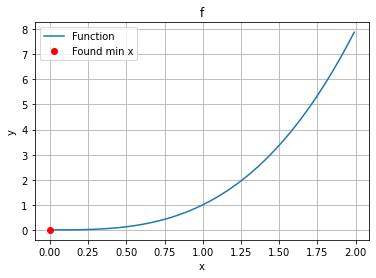

Found min x=0.2 with 999 iterations
Took 0.0010223388671875 sec


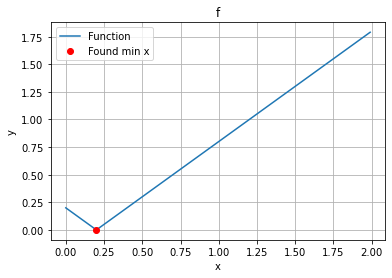

Found min x=0.223 with 989 iterations
Took 0.0009481906890869141 sec


<ipython-input-95-426d29ca77a2>:8: RuntimeWarning: divide by zero encountered in true_divide
  return x*np.sin(1/x)
<ipython-input-95-426d29ca77a2>:8: RuntimeWarning: invalid value encountered in sin
  return x*np.sin(1/x)


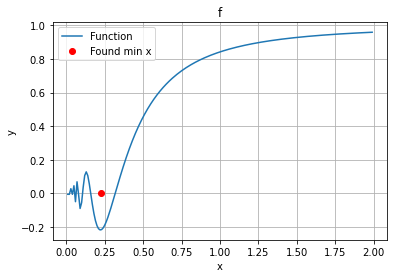

In [236]:
time_and_plot(exhaustive, f1, (0,1))
time_and_plot(exhaustive, f2, (0,1))
time_and_plot(exhaustive, f3, (0.01,1))

## Dichotomy method function

In [237]:
def dichotomy(f, range_, tol):
    delta=tol/2
    a,b = range_
    iter_count = 0

    while abs(a-b)>=tol:
        iter_count += 1
        x1 = (a+b-delta)/2
        x2 = (a+b+delta)/2
        fx1 = f(x1)
        fx2 = f(x2)
        a = a  if fx1<=fx2 else x1
        b = x2 if fx1<=fx2 else b
    return abs(a+b)/2, iter_count

Found min x=0.0004940185546875001 with 11 iterations
Took 6.341934204101562e-05 sec


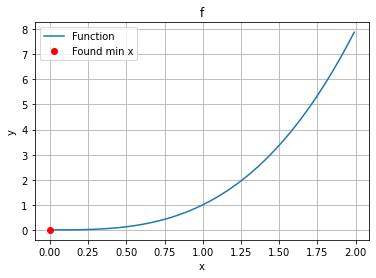

Found min x=0.20010119628906245 with 11 iterations
Took 5.626678466796875e-05 sec


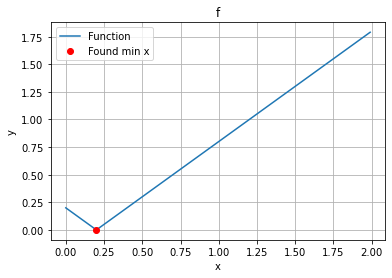

Found min x=0.22259631347656245 with 11 iterations
Took 8.869171142578125e-05 sec


<ipython-input-95-426d29ca77a2>:8: RuntimeWarning: divide by zero encountered in true_divide
  return x*np.sin(1/x)
<ipython-input-95-426d29ca77a2>:8: RuntimeWarning: invalid value encountered in sin
  return x*np.sin(1/x)


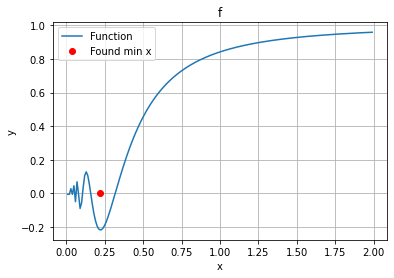

In [238]:
time_and_plot(dichotomy, f1, (0,1))
time_and_plot(dichotomy, f2, (0,1))
time_and_plot(dichotomy, f3, (0.01,1))

## Golden section function

In [239]:
def golden(f, range_, tol):
    ratio = (1 + math.sqrt(5))/2
    resphi = 2 - ratio
    iter_count = 0
    def golden_section(f, a, c, b, tol):
        nonlocal iter_count
        iter_count+=1
        if abs(a - b) <= tol:
            return (a + b)/2
        
        d = c + resphi*(b - c)
        if f(d) <= f(c):
            return golden_section(f, c, d, b, tol)
        else:
            return golden_section(f, c, d, a, tol)

    return golden_section(f, range_[0], (-1 + resphi*2), range_[1], tol), iter_count

Found min x=0.00036656871792870255 with 15 iterations
Took 0.00011658668518066406 sec


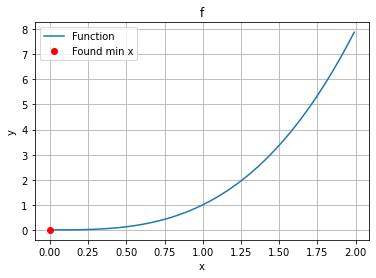

Found min x=0.19998677860772957 with 27 iterations
Took 7.748603820800781e-05 sec


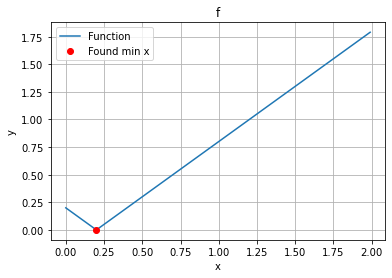

Found min x=0.22245925614958 with 27 iterations
Took 0.0001685619354248047 sec


<ipython-input-95-426d29ca77a2>:8: RuntimeWarning: divide by zero encountered in true_divide
  return x*np.sin(1/x)
<ipython-input-95-426d29ca77a2>:8: RuntimeWarning: invalid value encountered in sin
  return x*np.sin(1/x)


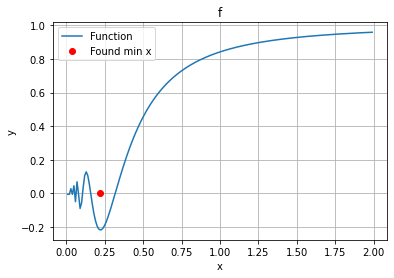

In [240]:
time_and_plot(golden, f1, (0,1))
time_and_plot(golden, f2, (0,1))
time_and_plot(golden, f3, (0.01,1))

# Multi-dimensional methods

## Define goal function

In [305]:
alpha = random.random()
beta  = random.random()
k = 100
mu, sigma = 0, 0.1 # mean and standard deviation
s = list(np.random.normal(mu, sigma, k))
x_k = list(range(100))
y_k = list(map(lambda x,delta: alpha*(x/k) + beta + delta, 
                   x_k, s))

## Plot goal function

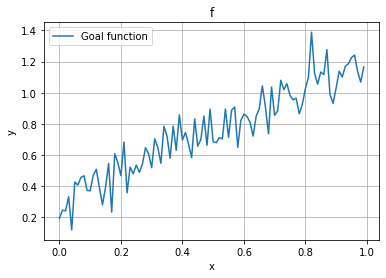

In [306]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()
plt.show()


## Define minimization function

In [307]:
def linear(params):
    x = np.linspace(0,100,100)
    a,b = params
    return a*x-b

def D(x, y_k):
    res = (linear(x)-y_k)**2
    return np.sum(res)

In [308]:
res = so.minimize(D, x0=np.zeros(shape=(2,)), args=y_k)

In [309]:
res

      fun: 0.9945177020960303
 hess_inv: array([[5.88118812e-06, 2.94059406e-04],
       [2.94059406e-04, 1.97029703e-02]])
      jac: array([2.88419425e-04, 1.85519457e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 90
      nit: 2
     njev: 26
   status: 2
  success: False
        x: array([ 0.00893647, -0.30882277])

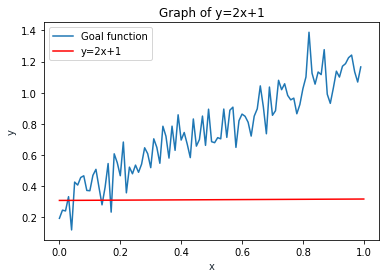

In [312]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()


x = np.linspace(0,1,100)
y = res.x[0]*x-res.x[1]
plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()